# Ссылка на используемый dataset: 
https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Прочитаем данные 
df = pd.read_csv("marketing_AB.csv")

In [4]:
#Посмотрим на данные  
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
#Проверим, есть ли у нас дубликаты по идентификатору пользователя
df.duplicated(subset = 'user id').sum()

0

In [6]:
#Удалим ненужные колонки  
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [7]:
#Проверим, сколько уровней у категориальных переменных 
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']] 
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [9]:
#Посмотрим на уникальные значения
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


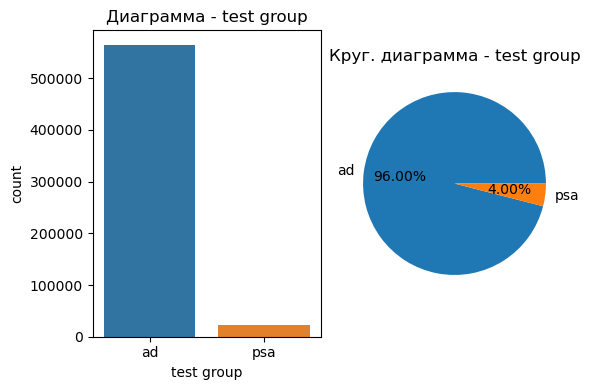

In [10]:
variable = 'test group'

plt.figure(figsize = (6, 4)) 

# Диаграмма
plt.subplot(1, 2, 1) 
sns.countplot(x=variable, data=df_cat) 
plt.title(f'Диаграмма - {variable}')

# Круговая диаграмма  
plt.subplot(1, 2, 2) 
counts = df_cat[variable].value_counts() 
plt.pie(counts, labels=counts.index, autopct='%0.2f%%') 
plt.title(f'Круг. диаграмма - {variable}')

plt.tight_layout()

plt. show()

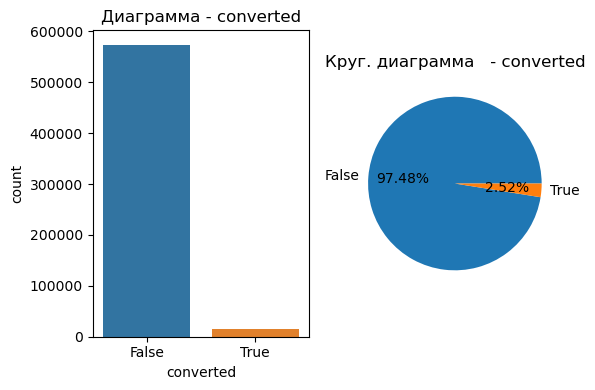

In [11]:
variable = 'converted'

plt.figure(figsize = (6, 4)) 

# Диаграмма 
plt.subplot(1, 2, 1) 
sns.countplot(x=variable, data=df_cat) 
plt.title(f'Диаграмма - {variable}')

# Круговая диаграмма  
plt.subplot(1, 2, 2) 
counts = df_cat[variable].value_counts() 
plt.pie(counts, labels=counts.index, autopct='%0.2f%%') 
plt.title(f'Круг. диаграмма   - {variable}')
 
plt.tight_layout()

plt. show()

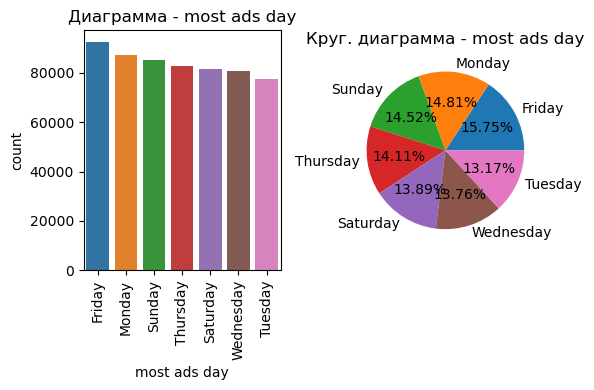

In [13]:
variable = 'most ads day'

plt.figure(figsize = (6, 4)) 

# Диаграмма
plt.subplot(1, 2, 1) 
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index) 
plt.title(f'Диаграмма - {variable}')
plt.xticks(rotation = 90 )

# Круговая диаграмма  
plt.subplot(1, 2, 2) 
counts = df_cat[variable].value_counts() 
plt.pie(counts, labels=counts.index, autopct='%0.2f%%') 
plt.title(f'Круг. диаграмма - {variable}')

plt.tight_layout()

plt. show()

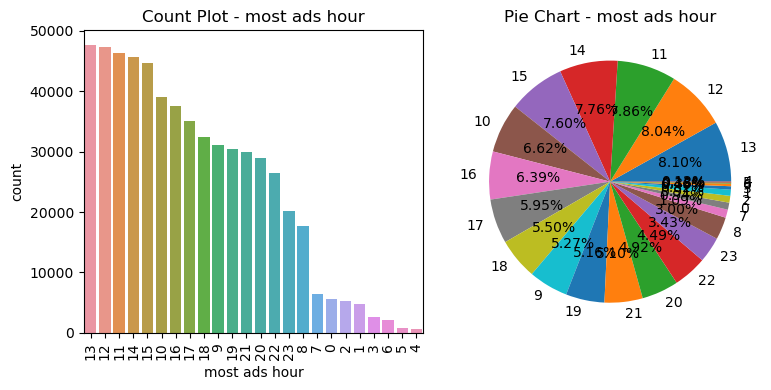

In [14]:
variable = 'most ads hour'

plt.figure(figsize = (8, 4)) 

# Диаграмма
plt.subplot(1, 2, 1) 
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index) 
plt.title(f'Диаграмма - {variable}')
plt.xticks(rotation = 90 )

# Круговая диаграмма  
plt.subplot(1, 2, 2) 
counts = df_cat[variable].value_counts() 
plt.pie(counts, labels=counts.index, autopct='%0.2f%%') 
plt.title(f'Круг. диаграмма  - {variable}')

plt.tight_layout()

plt. show()

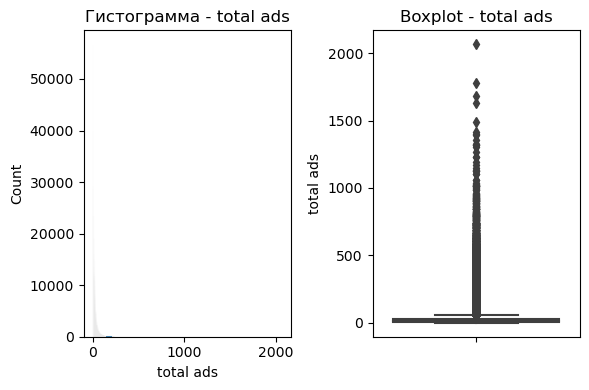

In [14]:
variable = 'total ads'
plt.figure(figsize = (6, 4)) 

# Гистограмма
plt.subplot(1, 2, 1) 
sns. histplot(x=variable, data=df) 
plt.title(f'Гистограмма - {variable}')

# Боксплот
plt.subplot(1, 2, 2) 
sns.boxplot(y = variable, data = df) 
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

plt.show()

In [15]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

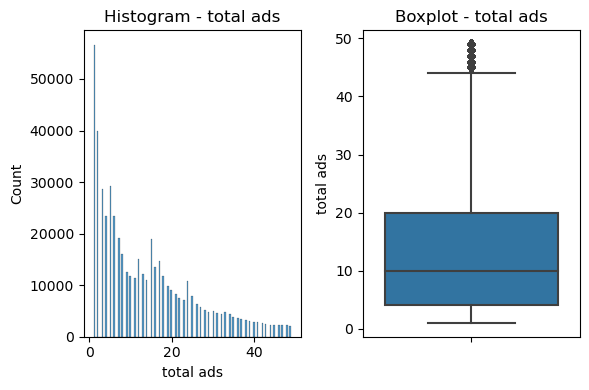

In [16]:
variable = 'total ads'
plt.figure(figsize = (6, 4))

# Гистограмма
plt.subplot(1, 2, 1)

# Фильтрация данных по значению, близкому к 75-му процентилю, только для лучшей визуализации.
sns.histplot(x=variable, data=df[df['total ads'] < 50] )
plt.title(f'Histogram - {variable}')

# Круговая диаграмма
plt. subplot(1, 2, 2)
sns.boxplot(y = variable, data = df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

plt.show()

## Bivariate analysis

In [17]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [20]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index') 
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


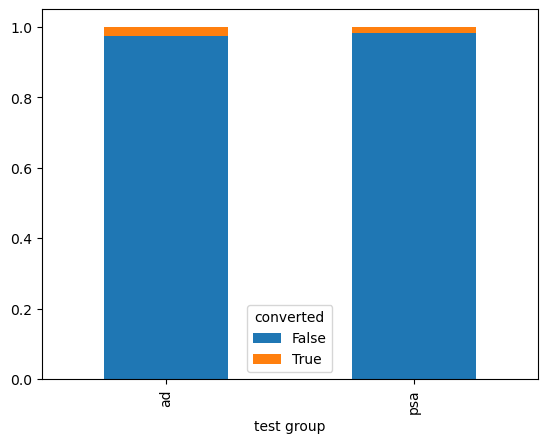

In [23]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


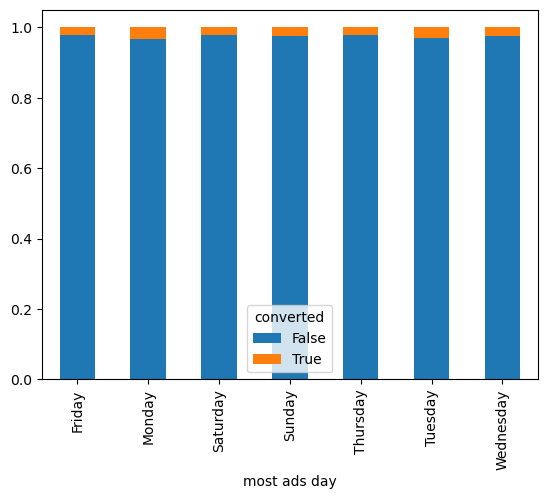

In [22]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index') 
print(ct_conversion_day.sort_values(by = True, ascending = False)) 
ct_conversion_day.plot.bar(stacked = True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


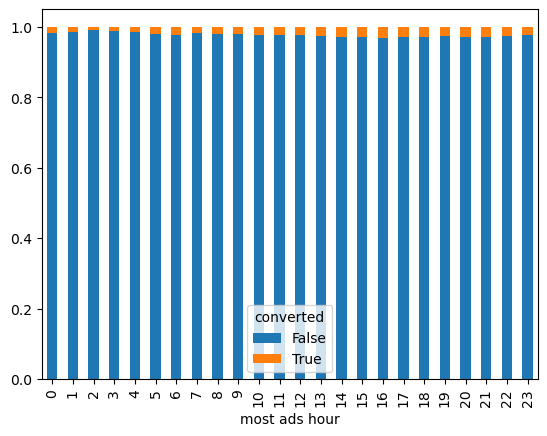

In [24]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True);

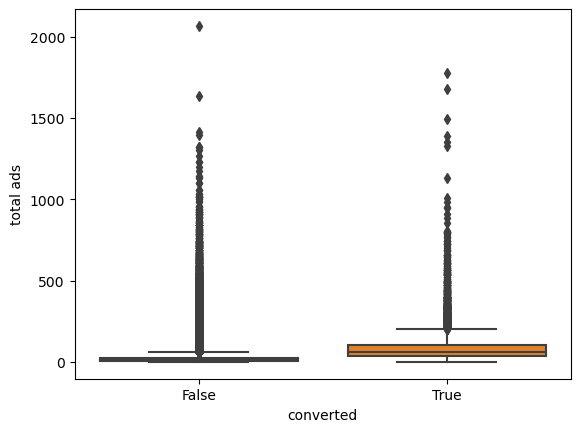

In [25]:
sns.boxplot(x = 'converted', y = 'total ads', data = df);

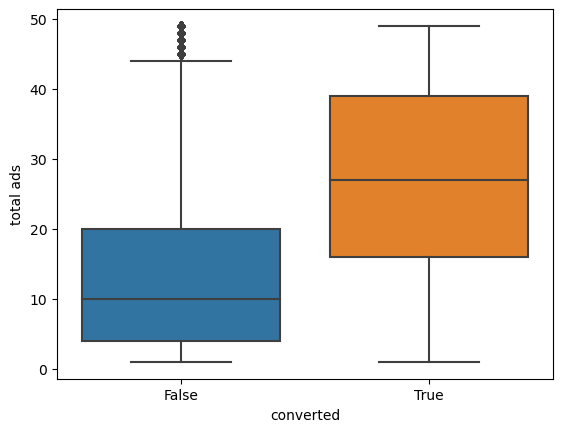

In [26]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50]);

## Statistical Tests

In [27]:
from scipy.stats import chi2_contingency 
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        # Создадим таблицу сопряженности 
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        
        # Выполним тест хи-квадрат
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Результат 
        print(f"\nChi-squared test for {variable} vs. converted:") 
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")
        
        # Проверим значимость
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.") 
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [28]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [31]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Шаг 1: Проверьте предположения

# Предположение о нормальности

shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False] ['total ads']) 
print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}") 
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Предположение о равенстве дисперсий
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads']) 
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


In [32]:
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha: 
    # Допущения выполнены – используем t-критерий для определения средних значений
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads']) 
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    
    # Допущения не выполнены – для определения медианы используем U-критерий Манна-Уитни.
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads']) 
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


## Выводы

Во время выполнения AB-теста обнаружено, что различия в конверсии связаны с количеством просмотренных людьми объявлений. Медианное количество объявлений, просмотренных теми, кто конвертировалcя, составило около 25, в то время как медиана для неконвертировавшихся была около 10. P-значение, равное нулю, указывает на статистическую значимость этого различия. Также отмечается важность других факторов, таких как наличие или отсутствие просмотра рекламы, день и время показа объявлений, а также частота повторного таргетирования одного и того же клиента.